In [ ]:
import numpy as np
from numpy.linalg import inv
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random.default_rng(123)

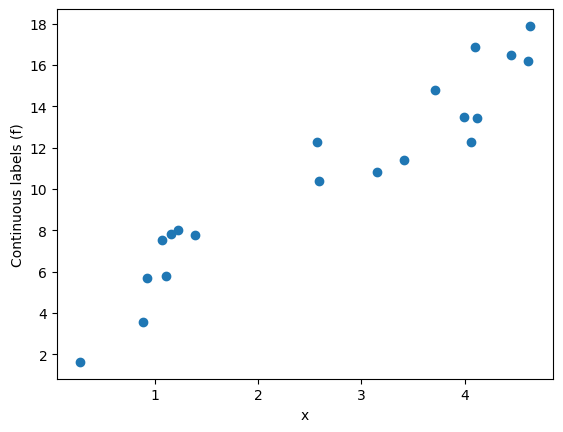

In [ ]:
x = 5 * rng.random(20)
f = 3 * x + 5 * rng.random(20)
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)');

In [ ]:
X = np.array([np.ones(len(x)), x]).T
a = inv(X.T @ X) @ X.T @ f
# Create the "model"

In [ ]:

x_predict = np.linspace(0, 5, num=100)
f_predict = a[0] + a[1] * x_predict
# "Predict" using the model

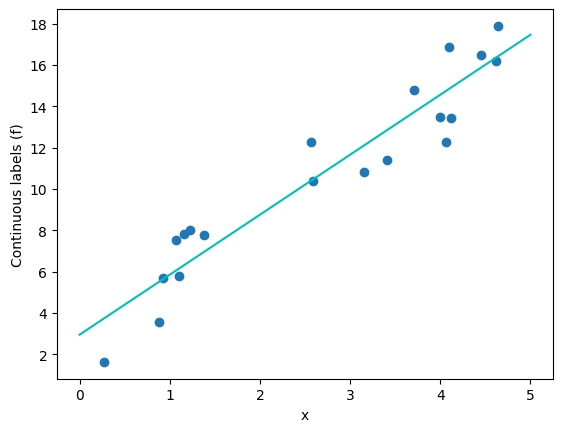

In [ ]:
plt.scatter(x, f)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(x_predict, f_predict, 'c');

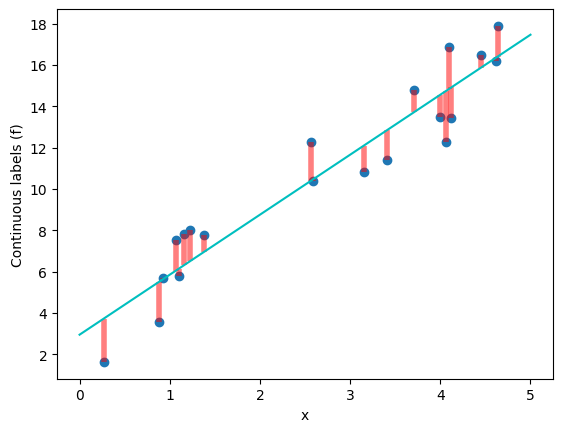

In [ ]:
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
segments = [((x[i], f[i]), (x[i], fp[i])) for i in range(len(x))]
lc = LineCollection(segments, color='r', linewidth=4, alpha=0.5)
plt.scatter(x, f)
plt.gca().add_collection(lc)
plt.xlabel('x')
plt.ylabel('Continuous labels (f)')
plt.plot(x_predict, f_predict, 'c')
plt.show()

In [ ]:
linear_example = {'data': [x, f], 'model': a}

In [ ]:
x1 = 5 * rng.random(100)
x2 = 5 * rng.random(100)
f = 10 - (3*x1 + 2* x2 + 2 * rng.random(100))

In [ ]:
X = np.array([np.ones(len(x1)), x1, x2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f

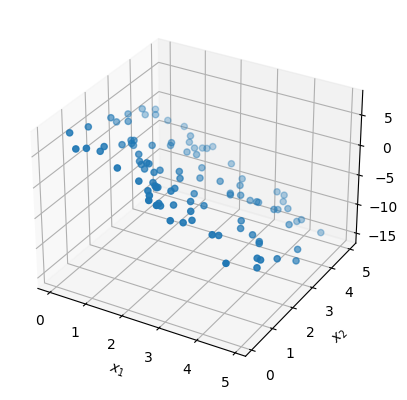

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, f)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('f')
plt.show()

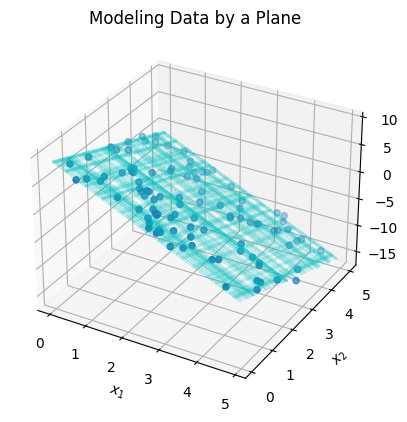

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

xx1, xx2 = np.meshgrid(x1, x2)
zz = a[0] + a[1] * xx1 + a[2] * xx2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.plot_wireframe(xx1, xx2, zz, color='c', alpha=0.2)
ax.scatter(x1, x2, f)
ax.set_title('Modeling Data by a Plane')
plt.show()

In [ ]:
planar_example = {'data': [np.array([x1, x2]).T, f], 'model': a}

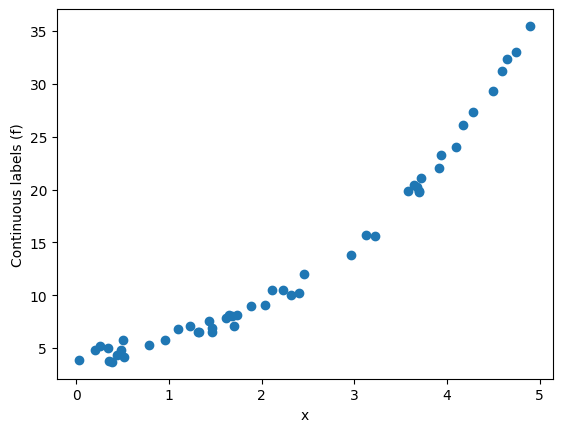

In [ ]:
x = 5 * rng.random(50)
f = 3 * np.exp(x/2) + 2 * rng.random(50)
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)');

In [ ]:
phi0 = np.ones(len(x))
phi1 = x
phi2 = x**2
X = np.array([phi0, phi1, phi2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f

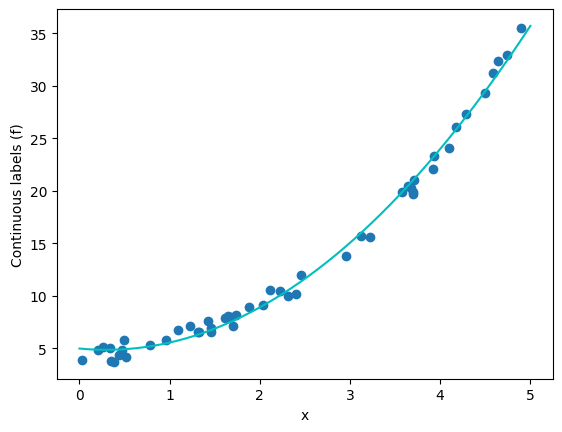

In [ ]:
xcurve_predict = np.linspace(0, 5, num=500)
phi0 = np.ones(len(xcurve_predict))
phi1 = xcurve_predict
phi2 = xcurve_predict**2
fcurve_predict = a[0] * phi0 + a[1] * phi1 + a[2] * phi2
plt.scatter(x, f)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(xcurve_predict, fcurve_predict, 'c');

In [ ]:
curve_example = {'data': [x, f], 'model': a, 'type': 'quadratic'}

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [ ]:
x, f = linear_example['data']
# Recall the saved data from the first example
model.fit(x[:, np.newaxis], f) # Training step

LinearRegression()

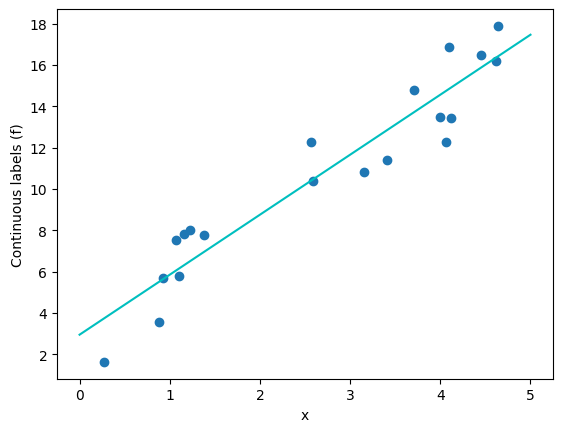

In [ ]:
xfit = np.linspace(0, 5, num=100)
ffit = model.predict(xfit[:, np.newaxis])
# Prediction step
plt.scatter(x, f);
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(xfit, ffit, 'c');

In [ ]:
model.intercept_, model.coef_

(2.9548137487468367, array([2.90310325]))

In [ ]:
linear_example['model']

array([2.95481375, 2.90310325])

In [ ]:
x12, f = planar_example['data']
model.fit(x12, f)

LinearRegression()

In [ ]:
model.intercept_, model.coef_

(9.167204926561409, array([-3.03592026, -2.03048875]))

In [ ]:
planar_example['model']

array([ 9.16720493, -3.03592026, -2.03048875])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
q = PolynomialFeatures(3, include_bias=False)

In [ ]:
data = np.array([5, 7, 9])[:, np.newaxis]
q.fit_transform(data)

array([[  5.,  25., 125.],
       [  7.,  49., 343.],
       [  9.,  81., 729.]])

In [ ]:
 x, y = curve_example['data'] # load data from the prior example
                              # make model/pipeline and fit the data to it:
quadratic_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

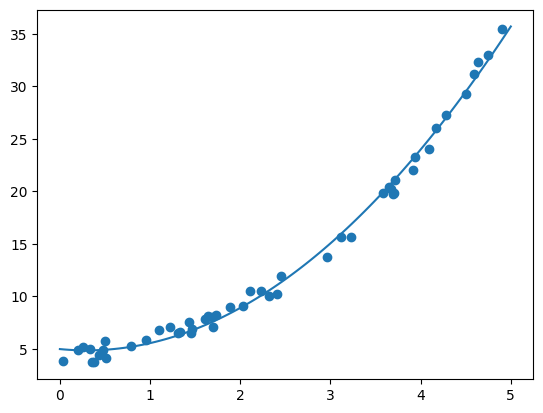

In [ ]:
yfit = quadratic_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
quadratic_model.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression()}

In [ ]:
quadratic_model.named_steps['linearregression'].intercept_

4.963796378670278

In [ ]:
quadratic_model.named_steps['linearregression'].coef_

array([ 0.        , -0.82755299,  1.39570211])

In [ ]:
curve_example['model'] # previously saved results from first principles

array([ 4.96379638, -0.82755299,  1.39570211])